In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [3]:
df.sample(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2613,ham,Thanks for sending this mental ability question..,NaN,NaN,NaN
4171,ham,"Sorry, I'll call later",NaN,NaN,NaN
2388,ham,wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evolution
# 6. Improvement
# 7. Website

## 1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.shape

(5572, 2)

In [9]:
# Renaming Columns name
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(2)

,target,text
4158,ham,Now got tv 2 watch meh? U no work today?
1354,ham,Baaaaabe! I misss youuuuu ! Where are you ? I ...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
# Assigning 0 to ham and 1 to spam 
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.sample(2)

,target,text
2504,0,"Hello, my boytoy! I made it home and my consta..."
3234,0,"Yes, princess. Toledo."


In [14]:
# Checking null values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# checking for duplicate values
df.duplicated().sum()

403

In [16]:
# Remove Duplicates
df=df.drop_duplicates(keep='first')

In [17]:
df.shape

(5169, 2)

## 2.EDA

In [18]:
# checking how much data is spam and how much is ham 
h= df['target'].value_counts()
h

target
0    4516
1     653
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

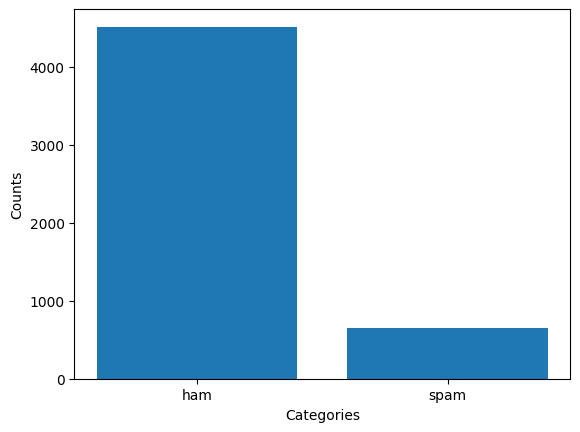

In [19]:
import matplotlib.pyplot as plt
labels = ['ham','spam']
plt.bar(labels,h.values)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.show

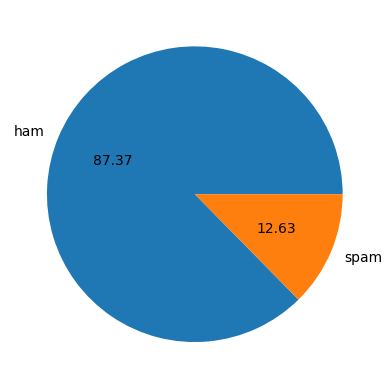

In [20]:
plt.pie(h,labels=labels,autopct='%0.2f')
plt.show()

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91702\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_character']=df['text'].apply(len)
df.head(4)

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49


In [23]:
# Number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head(3)

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [25]:
df.describe()

,target,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [26]:
# Checking only for spam 
df[df['target']==1].describe()

,target,num_character,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [27]:
# Checking only for ham 
df[df['target']==0].describe()

,target,num_character,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


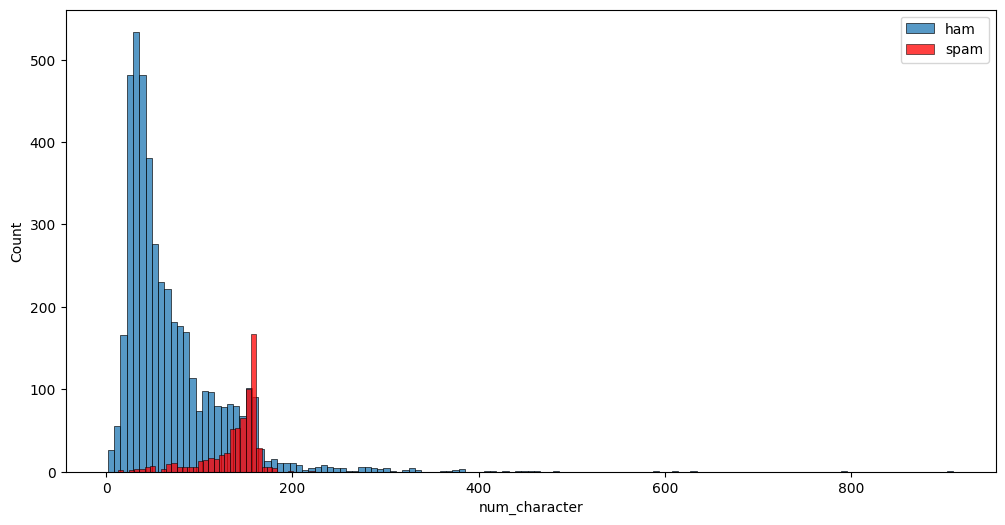

In [28]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_character'],label='ham')
sns.histplot(df[df['target']==1]['num_character'],color='red',label='spam')
plt.legend()
plt.show()

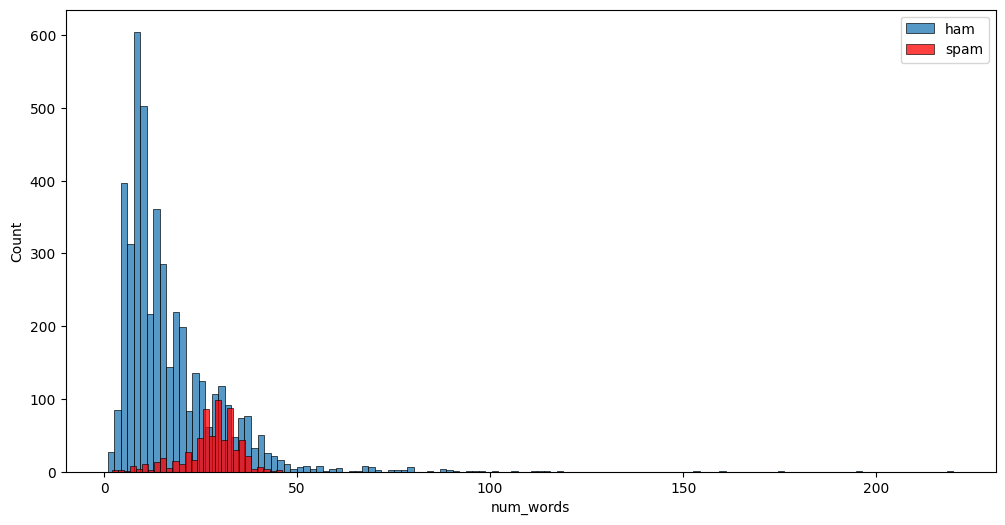

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'],label='ham')
sns.histplot(df[df['target']==1]['num_words'],color='red',label='spam')
plt.legend()
plt.show()

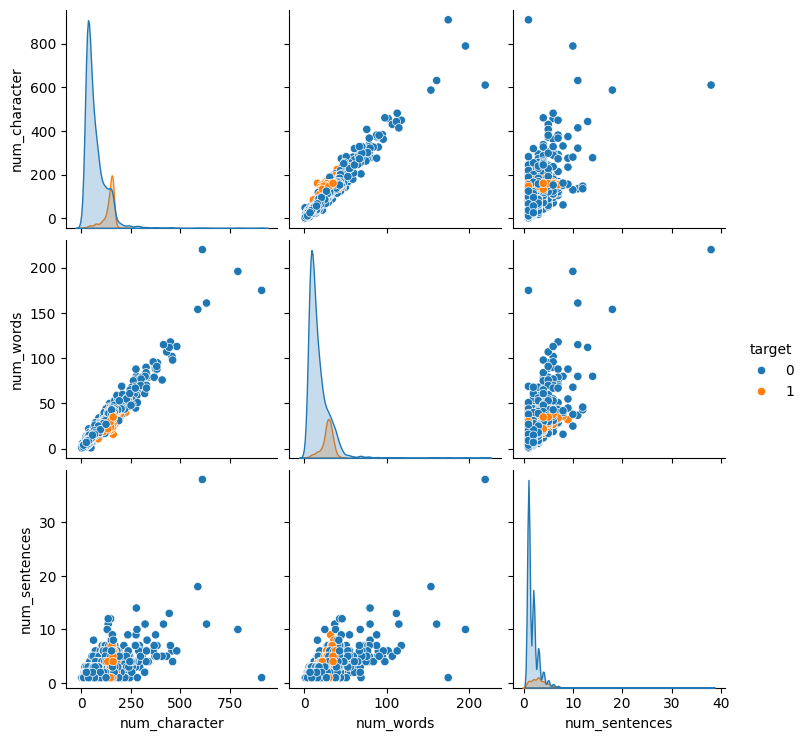

In [30]:
sns.pairplot(df,hue='target')

<Axes: >

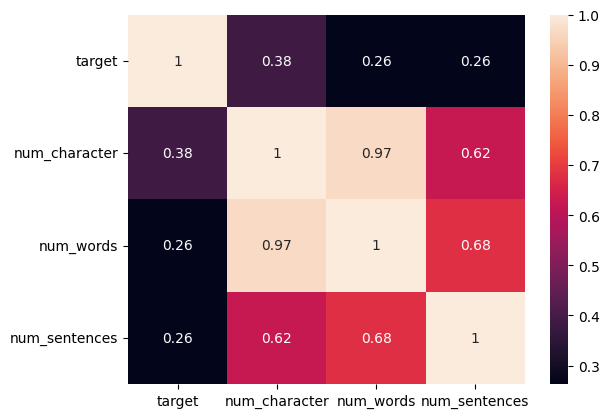

In [31]:
sns.heatmap(df[['target','num_character','num_words','num_sentences']].corr(),annot=True)

## 3. Data Preprocessing

In [32]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
from nltk.stem.porter import PorterStemmer
import string
ps = PorterStemmer()

In [39]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for j in text:
        if j not in stop_words and j not in string.punctuation:
            y.append(j)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    
    return ' '.join(y)
            
            
    
    

In [40]:
transform_text('How are yoy dancing  * with me?')

'yoy danc'

In [41]:
df['transformed'] = df['text'].apply(transform_text)

In [42]:
df.head(3)

,target,text,num_character,num_words,num_sentences,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [43]:
# Extracting top 30 words used in spam sms
spam_corpus=[]
for msg in df[df['target']==1]['transformed'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [44]:
len(spam_corpus)

9939

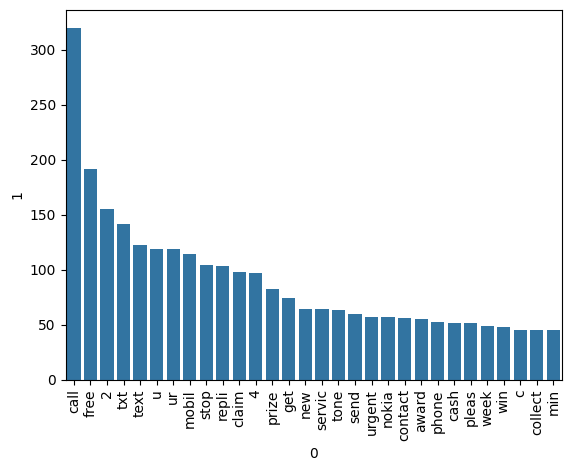

In [45]:
from collections import Counter
most_freq=pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=most_freq[0],y=most_freq[1])
plt.xticks(rotation='vertical')
plt.show()

In [46]:
# Extracting top 30 words used in ham sms
ham_corpus=[]
for msg in df[df['target']==0]['transformed'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [47]:
len(ham_corpus)

35404

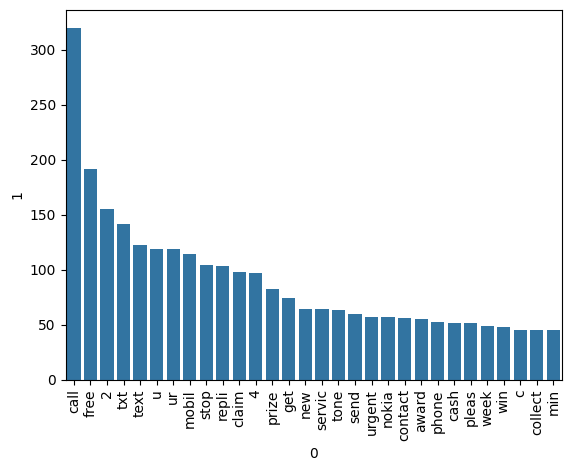

In [48]:
from collections import Counter
most_freq_ham=pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=most_freq[0],y=most_freq[1])
plt.xticks(rotation='vertical')
plt.show()

### 4.Model Building

##### Checking with Bag of Words

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [52]:
X = cv.fit_transform(df['transformed']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
X.shape

(5169, 6708)

In [56]:
Y = df['target'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [62]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [64]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))


0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [65]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [66]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


##### Checking for tfidf

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [68]:
X2 = tfidf.fit_transform(df['transformed']).toarray()
Y2 = df['target'].values

In [69]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X2,Y2,test_size=0.2,random_state=2)


In [70]:
gnb.fit(X_train2,Y_train2)
y_pred4 = gnb.predict(X_test2)
print(accuracy_score(Y_test2,y_pred4))
print(confusion_matrix(Y_test2,y_pred4))
print(precision_score(Y_test2,y_pred4))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [71]:
mnb.fit(X_train2,Y_train2)
y_pred5 = mnb.predict(X_test2)
print(accuracy_score(Y_test2,y_pred5))
print(confusion_matrix(Y_test2,y_pred5))
print(precision_score(Y_test2,y_pred5))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [72]:
bnb.fit(X_train2,Y_train2)
y_pred6 = bnb.predict(X_test2)
print(accuracy_score(Y_test2,y_pred6))
print(confusion_matrix(Y_test2,y_pred6))
print(precision_score(Y_test2,y_pred6))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


#### Conclusion : we keep mulinomialNB and tfidf vectorizer technique


In [73]:
# Checking for more machine learning algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [75]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver = 'liblinear',penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [76]:
clfs = {
    'SVC':svc,
    'KNeighborsClassifier':knc,
    'MultinomialNB':mnb,
    'DecisionTreeClassifier':dtc,
    'LogisticRegression':lrc,
    'RandomForestClassifier':rfc,
    'Adaboost':abc,
    'BaggingClassifier':bc,
    'ExtraTreesClassifier':etc,
    'GradientBoostingClassifier':gbdt,
    'XGBClassifier':xgb

}

In [77]:
def train_classifier(clf,X_train3,Y_train3,X_test3,Y_test3):
    clf.fit(X_train3,Y_train3)
    y_pred_new = clf.predict(X_test3)
    accuracy = accuracy_score(Y_test3,y_pred_new)
    precision=precision_score(Y_test3,y_pred_new)
    return accuracy,precision

In [79]:
accuracy_scores = []
precision_scores = []
for key,values in clfs.items():
    current_acc,current_pre = train_classifier(values,X_train2,Y_train2,X_test2,Y_test2)
    accuracy_scores.append(current_acc)
    precision_scores.append(current_pre)
    

In [84]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuacy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuacy,Precision
1,KNeighborsClassifier,0.900387,1.000000
2,MultinomialNB,0.959381,1.000000
5,RandomForestClassifier,0.971954,1.000000
8,ExtraTreesClassifier,0.972921,0.982456
0,SVC,0.972921,0.974138
6,Adaboost,0.961315,0.945455
10,XGBClassifier,0.972921,0.943548
4,LogisticRegression,0.951644,0.940000
9,GradientBoostingClassifier,0.952611,0.923810
7,BaggingClassifier,0.958414,0.862595


In [85]:
# checking for only 3000 features of tfidf
tfidf2 = TfidfVectorizer(max_features=3000)
X3 = tfidf2.fit_transform(df['transformed']).toarray()
Y3 = df['target'].values

# Now train test split
X_train4,X_test4,Y_train4,Y_test4 = train_test_split(X3,Y3,test_size=0.2,random_state=2)

In [86]:
accuracy_scores2 = []
precision_scores2 = []
for key,values in clfs.items():
    current_acc2,current_pre2 = train_classifier(values,X_train4,Y_train4,X_test4,Y_test4)
    accuracy_scores2.append(current_acc2)
    precision_scores2.append(current_pre2)

In [93]:
performance_df2 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuacy_3000(feature)':accuracy_scores2,'Precision_3000(feature)':precision_scores2}).sort_values('Precision_3000(feature)',ascending=False)
performance_df2

,Algorithm,Accuacy_3000(feature),Precision_3000(feature)
1,KNeighborsClassifier,0.905222,1.000000
2,MultinomialNB,0.970986,1.000000
5,RandomForestClassifier,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ExtraTreesClassifier,0.974855,0.974576
4,LogisticRegression,0.958414,0.970297
6,Adaboost,0.960348,0.929204
10,XGBClassifier,0.967118,0.926230
9,GradientBoostingClassifier,0.946809,0.919192
7,BaggingClassifier,0.958414,0.868217


In [94]:
performance_df.merge(performance_df2,on='Algorithm')

,Algorithm,Accuacy,Precision,Accuacy_3000(feature),Precision_3000(feature)
0,KNeighborsClassifier,0.900387,1.000000,0.905222,1.000000
1,MultinomialNB,0.959381,1.000000,0.970986,1.000000
2,RandomForestClassifier,0.971954,1.000000,0.975822,0.982906
3,ExtraTreesClassifier,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,Adaboost,0.961315,0.945455,0.960348,0.929204
6,XGBClassifier,0.972921,0.943548,0.967118,0.926230
7,LogisticRegression,0.951644,0.940000,0.958414,0.970297
8,GradientBoostingClassifier,0.952611,0.923810,0.946809,0.919192
9,BaggingClassifier,0.958414,0.862595,0.958414,0.868217


In [95]:
mnb.fit(X_train4,Y_train4)
y_pred8 = mnb.predict(X_test4)
print(accuracy_score(Y_test4,y_pred8))
print(confusion_matrix(Y_test4,y_pred8))
print(precision_score(Y_test4,y_pred8))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [96]:
import pickle
pickle.dump(tfidf2,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))